1. Peran dalam dataset : <br>
2. Permasalahan yang ingin diselesaikan : Meningkatkan prediksi penjualan di setiap toko, memahami faktor-faktor yang mempengaruhi penjualan, dan mengoptimalkan strategi penjualan. <br>
3. Goal yang ingin dicapai : Meningkatkan akurasi peramalan penjualan di setiap toko, mengidentifikasi pola penjualan yang konsisten, dan memaksimalkan pendapatan. <br>
4. Objective yang ingin dilakukan : <br>
- Mengidentifikasi pola penjualan berdasarkan jenis toko, lokasi dan waktu<br>
- Menganalisis pengaruh diskon, hari libur, dan jenis lokasi terhadap penjualan.<br>
5. Business metric : <br> 
- Tingkat akurasi peramalan penjualan. <br>
- Persentase kenaikan penjualan setelah penerapan rekomendasi. <br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [6]:
data = df[['Store_id', 'Store_Type', 'Location_Type', 'Region_Code']].drop_duplicates()
data.head()

,Store_id,Store_Type,Location_Type,Region_Code
0,1,S1,L3,R1
1,253,S4,L2,R1
2,252,S3,L2,R1
3,251,S2,L3,R1
4,250,S2,L3,R4


In [7]:
df_group = data.groupby(['Region_Code', 'Location_Type', 'Store_Type'])['Store_id'].count()
df_group

Region_Code  Location_Type  Store_Type
R1           L1             S1            17
                            S2             2
                            S3            11
                            S4            21
             L2             S1             1
                            S3             4
                            S4            33
             L3             S1            13
                            S2             1
                            S3             3
             L4             S1             6
             L5             S1             4
                            S2             8
R2           L1             S1            35
                            S2             3
                            S3             7
                            S4             3
             L2             S1             6
                            S3             2
                            S4            13
             L3             S1            13
                

In [8]:
#Mengelompokan fitur sesuai data types numerik dan kategorik
nums = list(df.select_dtypes(include=['int64', 'float64']))
cats = list(df.select_dtypes(include=['object']))

print('fitur numerik : ', nums)
print('fitur kategorik : ', cats)

fitur numerik :  ['Store_id', 'Holiday', '#Order', 'Sales']
fitur kategorik :  ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']


In [9]:
cats = ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']
nums =  ['Store_id', 'Holiday', '#Order', 'Sales']

In [10]:
df[cats].describe()

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340,188340
unique,188340,4,5,4,516,2
top,T1000001,S1,L1,R1,2018-01-01,No
freq,1,88752,85140,63984,365,104051


In [11]:
df[nums].corr()

,Store_id,Holiday,#Order,Sales
Store_id,1.000000e+00,5.380970e-16,0.028290,0.004377
Holiday,5.380970e-16,1.000000e+00,-0.140496,-0.154779
#Order,2.828985e-02,-1.404963e-01,1.000000,0.941601
Sales,4.376631e-03,-1.547788e-01,0.941601,1.000000


<Axes: >

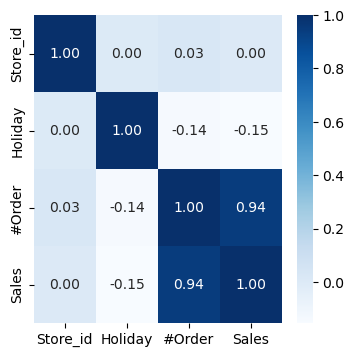

In [12]:
plt.figure(figsize=(4, 4))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [13]:
df.groupby('Region_Code')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Region_Code,,,,,,,,
R1,63984.0,46765.488405,21286.095441,0.0,32091.00,43125.0,57624.00,247215.0
R2,54180.0,40054.847344,16468.619529,0.0,29078.25,37548.0,48357.00,192156.0
R3,44376.0,42144.517063,16615.730308,0.0,30876.00,39661.5,50970.75,227127.0
R4,25800.0,39743.434249,15930.494396,2009.7,29195.64,37474.5,47796.00,161271.0


In [14]:
df.groupby('Location_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Location_Type,,,,,,,,
L1,85140.0,41453.597889,13520.616642,0.00,32598.00,39831.000,48702.000,144789.0
L2,48504.0,59231.480373,20642.975708,0.00,45731.25,56235.975,69555.000,247215.0
L3,29928.0,33072.257756,10720.509117,0.00,26119.98,31987.200,39084.000,117495.0
L4,10836.0,29067.414313,9176.431608,1969.14,23075.25,28554.000,34413.750,91677.0
L5,13932.0,25187.787261,8990.099353,1748.28,19416.00,24528.000,30395.235,86203.2


In [15]:
df.groupby('Location_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Location_Type,,,,,,,,
L1,85140.0,41453.597889,13520.616642,0.00,32598.00,39831.000,48702.000,144789.0
L2,48504.0,59231.480373,20642.975708,0.00,45731.25,56235.975,69555.000,247215.0
L3,29928.0,33072.257756,10720.509117,0.00,26119.98,31987.200,39084.000,117495.0
L4,10836.0,29067.414313,9176.431608,1969.14,23075.25,28554.000,34413.750,91677.0
L5,13932.0,25187.787261,8990.099353,1748.28,19416.00,24528.000,30395.235,86203.2


In [16]:
df.groupby('Store_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store_Type,,,,,,,,
S1,88752.0,37676.511694,12303.151090,0.00,29859.0,36444.0,44439.00,143841.0
S2,28896.0,27530.828222,9168.839395,1748.28,21666.0,26794.5,32703.90,96363.0
S3,24768.0,47063.068209,14907.465521,0.00,37656.0,45445.5,55062.75,166323.0
S4,45924.0,59945.685926,20750.228035,0.00,46503.0,57075.0,70326.75,247215.0


In [17]:
df.groupby('Holiday')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday,,,,,,,,
0,163520.0,43897.288998,18143.426019,0.0,31389.00,40530.00,52761.000,247215.00
1,24820.0,35451.878930,18822.332593,0.0,23778.57,33417.54,45247.125,197840.61


In [18]:
df.groupby('Discount')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
No,104051.0,37403.679678,16039.555183,0.00,27069.00,34791.0,44968.5,197840.61
Yes,84289.0,49426.497620,19071.656642,1969.14,36625.35,46242.0,58869.0,247215.00


C:\Users\Virman\AppData\Local\Temp\ipykernel_12896\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Virman\AppData\Local\Temp\ipykernel_12896\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Virman\AppData\Local\Temp\ipykernel_12896\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


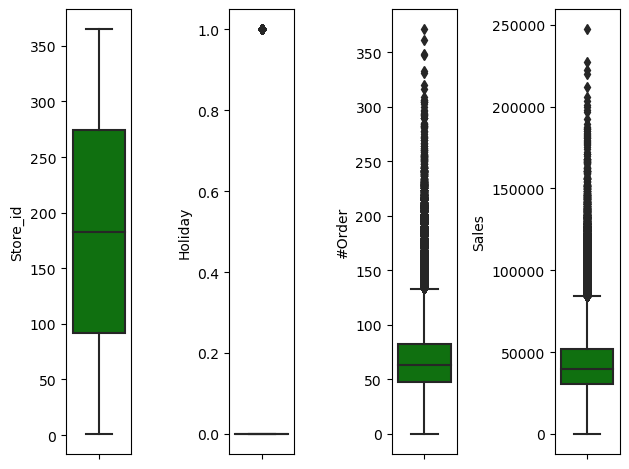

In [19]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

In [20]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Store_id', 'Holiday', '#Order', 'Sales']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 188340
Jumlah baris setelah memfilter outlier: 188340


C:\Users\Virman\AppData\Local\Temp\ipykernel_12896\1945719138.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Virman\AppData\Local\Temp\ipykernel_12896\1945719138.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Virman\AppData\Local\Temp\ipykernel_12896\1945719138.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


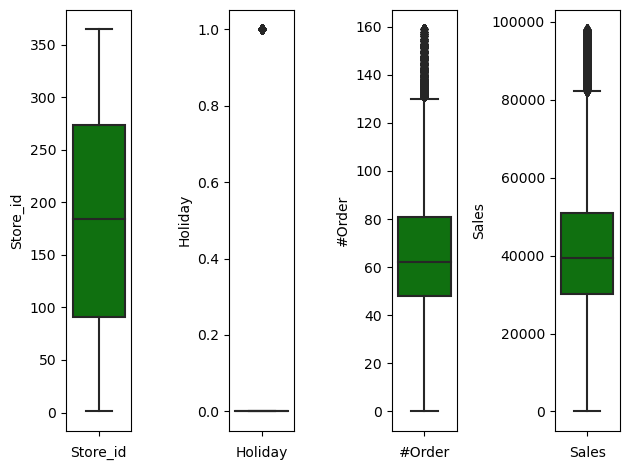

In [21]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    plt.tight_layout()

<Axes: xlabel='Holiday', ylabel='Sales'>

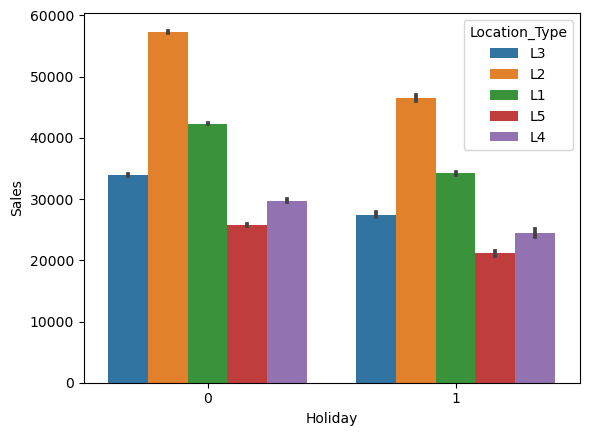

In [28]:
sns.barplot(data=df2, x='Holiday', y='Sales',hue='Location_Type')

Pengaruh hari libur terhadap penjualan menunjukkan bahwa terdapat penurunan terhadap penjualan ketika hari libur, hal ini dapat terjadi karena banyak store yang tutup pada hari libur.
Rekomendasi : promosi khusus atau strategi pemasaran untuk meningkatkan penjualan pada hari libur.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'L3'),
  Text(1, 0, 'L2'),
  Text(2, 0, 'L1'),
  Text(3, 0, 'L5'),
  Text(4, 0, 'L4')])

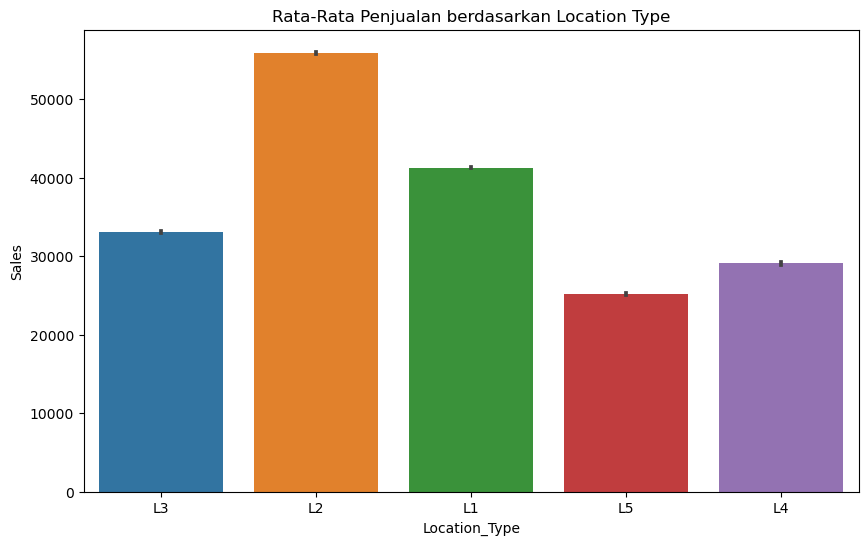

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Rata-Rata Penjualan berdasarkan Location Type')
sns.barplot(x='Location_Type',
            y='Sales',
            data=df2)
plt.xticks(rotation=0)

Berdasarkan location type, terdapat penjualan tertinggi pada L2 dan penjualan terendah terdapat pada L5

(array([0, 1, 2, 3]),
 [Text(0, 0, 'S1'), Text(1, 0, 'S4'), Text(2, 0, 'S3'), Text(3, 0, 'S2')])

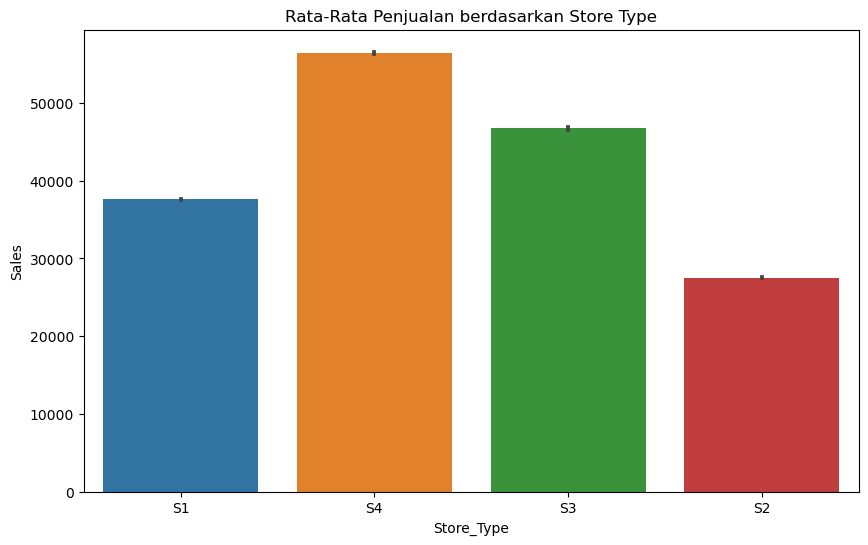

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Rata-Rata Penjualan berdasarkan Store Type')
sns.barplot(x='Store_Type',
            y='Sales',
            data=df2)
plt.xticks(rotation=0)

Penjualan tertinggi terdapat pada S4, dan terendah pada S2

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

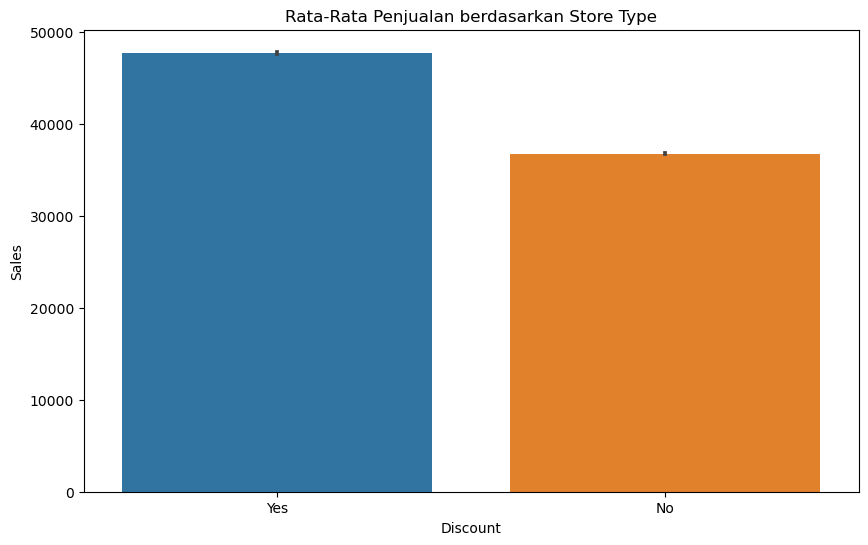

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Rata-Rata Penjualan berdasarkan Store Type')
sns.barplot(x='Discount',
            y='Sales',
            data=df2)
plt.xticks(rotation=0)

Penjualan tertinggi ketika ada program discount namun tidak berbeda secara signifikan

Rekomendasi : <br>
- Pada saat libur, bisa melakukan strategi promosi atau bisa dikombinasikan dengan program discount untuk menunjanga penjualan pada setiap store.
- Lokasi store sangat berpengaruh pada penjualan, perlu mengeksplore setiap lokasi untuk dapat melakukan penjualan secara merata
- Berdasarkan analisis jenis toko dan lokasi, strategi penjualan dapat dipersonalisasi untuk masing-masing toko, agar penjualan dapat meningkat secara rata